In [19]:
import sys
sys.path.insert(0, '/global/common/software/lsst/common/miniconda/py3-4.2.import GCRCatalogs12/lib/python3.6/site-packages')
import GCRCatalogs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
gc = GCRCatalogs.load_catalog('protoDC2')
data=gc.get_quantities([Mstar],filters=[(lambda z: (z > zlo) & (z < zhi), 'redshift_true')])

In [114]:
zlo=0.
zhi=1.
Mlo=7.
Mhi=12.
Mint=0.5
Mstar =  'stellar_mass'
Nbins=abs(Mhi-Mlo)/Mint
bins=np.logspace(Mlo,Mhi,Nbins+1) 
print ('bins:',np.log10(bins))
centers = (bins[1:]+bins[:-1])/2
Delta = (-bins[:-1]+bins[1:])
binindex = np.digitize(data[Mstar],bins)
mask = (binindex>0) & (binindex<=len(centers))
m0 = np.asarray([centers[i-1] for i in binindex[mask]])
N,binEdges=np.histogram(data[Mstar][mask],bins=bins)
sumM1,_=np.histogram(data[Mstar][mask],bins=bins,weights=(data[Mstar][mask]-m0))
sumM,_=np.histogram(data[Mstar],bins=bins,weights=(data[Mstar]))
sumMsq,_=np.histogram(data[Mstar],bins=bins,weights=(data[Mstar])**2)
sumM0,_=np.histogram(data[Mstar][mask],bins=bins,weights=(m0))
sumM2,_=np.histogram(data[Mstar][mask],bins=bins,weights=(data[Mstar][mask]-m0)**2)
mom1 = sumM1/Delta
mom2 = sumM2/Delta
mom0 =N/Delta
#mom1 = N*(sumM/N - centers)/Delta
#mom2 = N*(sumMsq/N - 2*centers*sumM/N + centers**2)/Delta
fprime = 12.*mom1/Delta**2
fdblprime = 360*(mom2 - mom0*Delta**2/12)/Delta**4
opt = Delta**2*fdblprime/fprime/24


bins: [  7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5  12. ]


[ 297614 1609834 3432020 2379478 1099380  617709  414314  122619   15956
    1424]
[  18219.38324649   26169.35084007 -290053.80628737 -359287.07374446
 -170570.67404926  -74181.77885582  -64703.14453418  -28767.75782943
   -4041.90722425    -441.52241875]
[  4.67618834e-10   6.71662765e-11  -7.44452328e-11  -9.22146487e-12
  -4.37786826e-13  -1.90395012e-14  -1.66067142e-15  -7.38353499e-17
  -1.03739623e-18  -1.13321179e-20]
[ -2.91685478e-17  -6.20471229e-18   2.43293294e-19   3.81058332e-20
   6.27732467e-22   7.71514632e-24   1.85973798e-25   3.83656875e-27
   1.95549919e-29   7.95817963e-32]
[  2.08113883e+07   6.58113883e+07   2.08113883e+08   6.58113883e+08
   2.08113883e+09   6.58113883e+09   2.08113883e+10   6.58113883e+10
   2.08113883e+11   6.58113883e+11]
[ -1.21516288e+06  -1.79962516e+07  -6.36656133e+06  -8.05013618e+07
  -2.79333861e+08  -7.89405742e+08  -2.18162314e+09  -1.01225593e+10
  -3.67218590e+10  -1.36808895e+11]
[-0.05619828 -0.26319073 -0.02944377 -0.1177312

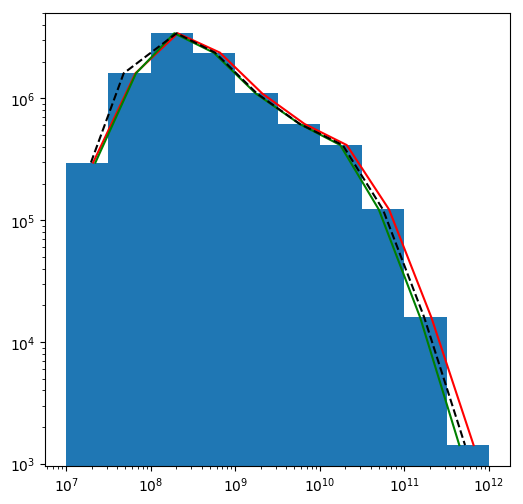

In [115]:
#print(sumM - centers)
#print (sumM1)
print (N)
print (mom1)
print (fprime)
print (fdblprime)
print(centers)
print (opt)
print (opt/Delta)
print (-centers + sumM/N)
print ((-centers + sumM/N)/Delta)


fig, ax = plt.subplots(ncols=1, figsize=(6,6), dpi=100)
ax.set_xscale('log')
ax.set_yscale('log')
ax.hist(data[Mstar][mask],bins=bins)
ax.plot(centers,N,color='r')
ax.plot(sumM/N,N,color='g')
ax.plot(centers+opt,N,color='black',ls='--')